In [18]:
#import this before other imports
from sklearnex import patch_sklearn,unpatch_sklearn

patch_sklearn()
#unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl
import seaborn as sns
from urllib.parse import urlparse
from tld import get_tld
import re
from sklearn.model_selection import train_test_split
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score,log_loss,precision_score,recall_score,make_scorer,accuracy_score
import json
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [20]:
train = pd.read_csv("train_set.csv")
train

,url,result
0,http://player.polyv.net/videos/3ee850a192d81e2...,2
1,http://www.hmaca.com/winnipeg-accounting-blog,1
2,http://www.generalcustom.com.br/index.php?opti...,1
3,http://bigcinema.tv/tag/%D0%94%D0%B8%D1%80%D0%...,0
4,http://www.hafenrocker.de/news/119-news-210920...,1
...,...,...
132287,http://masterstrans.com/component/contact/1,1
132288,http://www.tvmiros.gr/parousiasi-tou-sxediou-m...,1
132289,https://twitter.com/home?status=%E3%83%8C%E3%8...,0
132290,http://schertzauto.com/wp-content/themes/NAPA%...,2


In [21]:
valid = pd.read_csv("valid_set.csv")
valid

,url,result
0,http://jmrsl.net/index.php?option=com_jevents&...,1
1,http://www.ekwdesign.de/referenzen/corporate-d...,1
2,http://img25.artxun.com/sdd/oldimg/5dfd/5dfd94...,2
3,http://yourdayyourbudget.com/index.php?option=...,1
4,http://www.modconsolas.com/portal/index.php?li...,1
...,...,...
16532,http://bisaneema.org/%e0%a4%87%e0%a4%a4%e0%a4%...,2
16533,http://drogheriapreti.com/chi-siamo.html,1
16534,http://otomoto.pl/oferta/renault-trafic-zareje...,0
16535,http://www.bishopstrings.com/violins/ยฃ5000-ยฃ...,1


In [22]:
test = pd.read_csv("test_set.csv")
test

,url,result
0,http://www.jin0044.com/cl/?module=System&metho...,2
1,http://bjgdhm.com/show_products.asp?id=433,1
2,http://www.masseny.de/index.php?option=com_pho...,1
3,http://maybank2u.com.my/mbb_info/m2u/public/pe...,0
4,http://yourlust.com/videos/picked-up-whore-kar...,0
...,...,...
16532,http://www.lisambiental.com.br/x.txt,1
16533,http://pflegeheim-lausitz.de/index.php?option=...,1
16534,http://www.shekinahphotography.co.za/index.php...,1
16535,http://wddga.com/index.html?limitstart=20&font...,1


In [23]:
data=[train,valid,test]
urls = pd.concat(data, ignore_index=True)

In [24]:
urls

,url,result
0,http://player.polyv.net/videos/3ee850a192d81e2...,2
1,http://www.hmaca.com/winnipeg-accounting-blog,1
2,http://www.generalcustom.com.br/index.php?opti...,1
3,http://bigcinema.tv/tag/%D0%94%D0%B8%D1%80%D0%...,0
4,http://www.hafenrocker.de/news/119-news-210920...,1
...,...,...
165361,http://www.lisambiental.com.br/x.txt,1
165362,http://pflegeheim-lausitz.de/index.php?option=...,1
165363,http://www.shekinahphotography.co.za/index.php...,1
165364,http://wddga.com/index.html?limitstart=20&font...,1


In [25]:
vectorizer = CountVectorizer(analyzer='char')
train_vec = vectorizer.fit_transform(urls['url'])
train_vec.shape

(165366, 133)

In [26]:
print([(vectorizer.vocabulary_[w],w) for w in vectorizer.get_feature_names()])

[(0, ' '), (1, '!'), (2, '#'), (3, '$'), (4, '%'), (5, '&'), (6, "'"), (7, '('), (8, ')'), (9, '*'), (10, '+'), (11, ','), (12, '-'), (13, '.'), (14, '/'), (15, '0'), (16, '1'), (17, '2'), (18, '3'), (19, '4'), (20, '5'), (21, '6'), (22, '7'), (23, '8'), (24, '9'), (25, ':'), (26, ';'), (27, '<'), (28, '='), (29, '>'), (30, '?'), (31, '@'), (32, '['), (33, '\\'), (34, ']'), (35, '_'), (36, 'a'), (37, 'b'), (38, 'c'), (39, 'd'), (40, 'e'), (41, 'f'), (42, 'g'), (43, 'h'), (44, 'i'), (45, 'j'), (46, 'k'), (47, 'l'), (48, 'm'), (49, 'n'), (50, 'o'), (51, 'p'), (52, 'q'), (53, 'r'), (54, 's'), (55, 't'), (56, 'u'), (57, 'v'), (58, 'w'), (59, 'x'), (60, 'y'), (61, 'z'), (62, '{'), (63, '|'), (64, '}'), (65, '~'), (66, '\x8d'), (67, '\xa0'), (68, '¸'), (69, 'ä'), (70, 'å'), (71, 'ø'), (72, 'š'), (73, 'ˆ'), (74, 'ก'), (75, 'ข'), (76, 'ฃ'), (77, 'ค'), (78, 'ฅ'), (79, 'ง'), (80, 'จ'), (81, 'ฉ'), (82, 'ช'), (83, 'ซ'), (84, 'ฌ'), (85, 'ญ'), (86, 'ฎ'), (87, 'ฏ'), (88, 'ฐ'), (89, 'ฑ'), (90, 'ฒ'), (

In [27]:
l = [[] for _ in range(0,133)]
for i in range(0,165366):
    ex = train_vec[i].todense()
    for j in range(0,133):
        l[j].append(ex.item(j))

In [28]:
l1 = [[] for _ in range(0,133)]
for i in range(0,165366):
    if urls['result'][i] == 0:
        ex = train_vec[i].todense()
        for j in range(0,133):
            l1[j].append(ex.item(j))

In [29]:
l2 = [[] for _ in range(0,133)]
for i in range(0,165366):
    if urls['result'][i] == 1:
        ex = train_vec[i].todense()
        for j in range(0,133):
            l2[j].append(ex.item(j))

In [30]:
l3 = [[] for _ in range(0,133)]
for i in range(0,165366):
    if urls['result'][i] == 2:
        ex = train_vec[i].todense()
        for j in range(0,133):
            l3[j].append(ex.item(j))

In [31]:
l4 = [[] for _ in range(0,133)]
for i in range(0,165366):
    if urls['result'][i] == 3:
        ex = train_vec[i].todense()
        for j in range(0,133):
            l4[j].append(ex.item(j))

In [32]:
l5 = [[] for _ in range(0,133)]
for i in range(0,165366):
    if urls['result'][i] == 4:
        ex = train_vec[i].todense()
        for j in range(0,133):
            l5[j].append(ex.item(j))

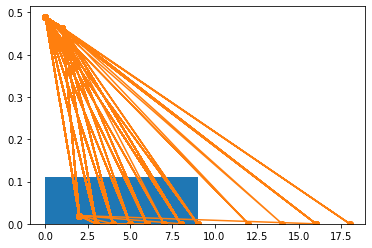

In [33]:
feature_index = 30
n, bins, patches = plt.hist(l[feature_index], bins=np.linspace(np.min(l[feature_index]), np.max(l[feature_index]), num=3), density = True)
fit = stats.norm.pdf(l[feature_index], np.mean(l[feature_index]), np.std(l[feature_index]))
pl.plot(l[feature_index],fit,'-o')
plt.show()

In [38]:
print("All Classes")
print("Mean: ", np.mean(l[feature_index]))
print("Standard Deviation: ", np.std(l[feature_index]))
print("Skewness: ", stats.skew(l[feature_index]))
print("Kurtosis: ", stats.kurtosis(l[feature_index]))

All Classes
Mean:  0.4826626997085253
Standard Deviation:  0.5659989511640846
Skewness:  2.4748826070776873
Kurtosis:  44.18694613863534


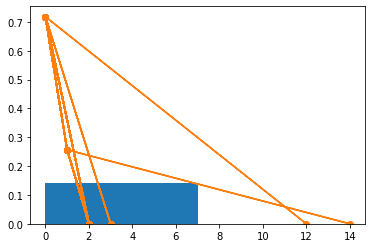

In [39]:
n, bins, patches = plt.hist(l1[feature_index], bins=np.linspace(np.min(l1[feature_index]), np.max(l1[feature_index]), num=3), density = True)
fit = stats.norm.pdf(l1[feature_index], np.mean(l1[feature_index]), np.std(l1[feature_index]))
pl.plot(l1[feature_index],fit,'-o')
plt.show()

In [40]:
print("Benign")
print("Mean: ", np.mean(l1[feature_index]))
print("Standard Deviation: ", np.std(l1[feature_index]))
print("Skewness: ", stats.skew(l1[feature_index]))
print("Kurtosis: ", stats.kurtosis(l1[feature_index]))

Benign
Mean:  0.2775171010232348
Standard Deviation:  0.464991764815708
Skewness:  2.214692828597389
Kurtosis:  32.20183524459213


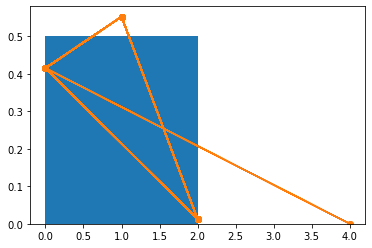

In [43]:
n, bins, patches = plt.hist(l2[feature_index], bins=np.linspace(np.min(l2[feature_index]), np.max(l2[feature_index]), num=3), density = True)
fit = stats.norm.pdf(l2[feature_index], np.mean(l2[feature_index]), np.std(l2[feature_index]))
pl.plot(l2[feature_index],fit,'-o')
plt.show()

In [44]:
print("Defacement")
print("Mean: ", np.mean(l2[feature_index]))
print("Standard Deviation: ", np.std(l2[feature_index]))
print("Skewness: ", stats.skew(l2[feature_index]))
print("Kurtosis: ", stats.kurtosis(l2[feature_index]))

Defacement
Mean:  0.5700985931554994
Standard Deviation:  0.4957732995886717
Skewness:  -0.27042872016211345
Kurtosis:  -1.8625051670035253


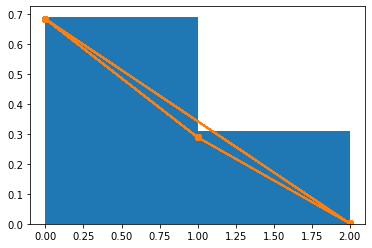

In [45]:
n, bins, patches = plt.hist(l3[feature_index], bins=np.linspace(np.min(l3[feature_index]), np.max(l3[feature_index]), num=3), density = True)
fit = stats.norm.pdf(l3[feature_index], np.mean(l3[feature_index]), np.std(l3[feature_index]))
pl.plot(l3[feature_index],fit,'-o')
plt.show()

In [46]:
print("Malware")
print("Mean: ", np.mean(l3[feature_index]))
print("Standard Deviation: ", np.std(l3[feature_index]))
print("Skewness: ", stats.skew(l3[feature_index]))
print("Kurtosis: ", stats.kurtosis(l3[feature_index]))

Malware
Mean:  0.3114300536053951
Standard Deviation:  0.46790737510958746
Skewness:  0.8801210475411414
Kurtosis:  -1.043710102895619


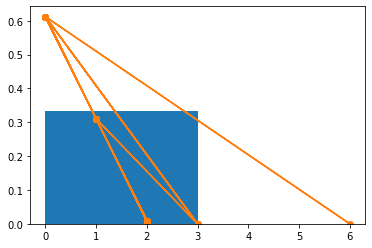

In [47]:
n, bins, patches = plt.hist(l4[feature_index], bins=np.linspace(np.min(l4[feature_index]), np.max(l4[feature_index]), num=3), density = True)
fit = stats.norm.pdf(l4[feature_index], np.mean(l4[feature_index]), np.std(l4[feature_index]))
pl.plot(l4[feature_index],fit,'-o')
plt.show()

In [48]:
print("Phishing")
print("Mean: ", np.mean(l4[feature_index]))
print("Standard Deviation: ", np.std(l4[feature_index]))
print("Skewness: ", stats.skew(l4[feature_index]))
print("Kurtosis: ", stats.kurtosis(l4[feature_index]))

Phishing
Mean:  0.2639237330657301
Standard Deviation:  0.5895800832496715
Skewness:  2.1673335955615647
Kurtosis:  3.930922446206525


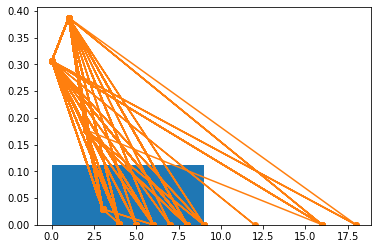

In [51]:
n, bins, patches = plt.hist(l5[feature_index], bins=np.linspace(np.min(l5[feature_index]), np.max(l5[feature_index]), num=3), density = True)
fit = stats.norm.pdf(l5[feature_index], np.mean(l5[feature_index]), np.std(l5[feature_index]))
pl.plot(l5[feature_index],fit,'-o')
plt.show()

In [52]:
print("Spam")
print("Mean: ", np.mean(l5[feature_index]))
print("Standard Deviation: ", np.std(l5[feature_index]))
print("Skewness: ", stats.skew(l5[feature_index]))
print("Kurtosis: ", stats.kurtosis(l5[feature_index]))

Spam
Mean:  0.7313333333333333
Standard Deviation:  0.9932194565597721
Skewness:  4.889623006774605
Kurtosis:  54.588888962631


## Model

In [53]:
train = pd.read_csv("train_set.csv")
train

,url,result
0,http://player.polyv.net/videos/3ee850a192d81e2...,2
1,http://www.hmaca.com/winnipeg-accounting-blog,1
2,http://www.generalcustom.com.br/index.php?opti...,1
3,http://bigcinema.tv/tag/%D0%94%D0%B8%D1%80%D0%...,0
4,http://www.hafenrocker.de/news/119-news-210920...,1
...,...,...
132287,http://masterstrans.com/component/contact/1,1
132288,http://www.tvmiros.gr/parousiasi-tou-sxediou-m...,1
132289,https://twitter.com/home?status=%E3%83%8C%E3%8...,0
132290,http://schertzauto.com/wp-content/themes/NAPA%...,2


In [54]:
valid = pd.read_csv("valid_set.csv")
valid

,url,result
0,http://jmrsl.net/index.php?option=com_jevents&...,1
1,http://www.ekwdesign.de/referenzen/corporate-d...,1
2,http://img25.artxun.com/sdd/oldimg/5dfd/5dfd94...,2
3,http://yourdayyourbudget.com/index.php?option=...,1
4,http://www.modconsolas.com/portal/index.php?li...,1
...,...,...
16532,http://bisaneema.org/%e0%a4%87%e0%a4%a4%e0%a4%...,2
16533,http://drogheriapreti.com/chi-siamo.html,1
16534,http://otomoto.pl/oferta/renault-trafic-zareje...,0
16535,http://www.bishopstrings.com/violins/ยฃ5000-ยฃ...,1


In [55]:
test = pd.read_csv("test_set.csv")
test

,url,result
0,http://www.jin0044.com/cl/?module=System&metho...,2
1,http://bjgdhm.com/show_products.asp?id=433,1
2,http://www.masseny.de/index.php?option=com_pho...,1
3,http://maybank2u.com.my/mbb_info/m2u/public/pe...,0
4,http://yourlust.com/videos/picked-up-whore-kar...,0
...,...,...
16532,http://www.lisambiental.com.br/x.txt,1
16533,http://pflegeheim-lausitz.de/index.php?option=...,1
16534,http://www.shekinahphotography.co.za/index.php...,1
16535,http://wddga.com/index.html?limitstart=20&font...,1


In [56]:
data=[train,valid]
train = pd.concat(data, ignore_index=True)

In [57]:
vectorizer = CountVectorizer(analyzer='char')
train_vec = vectorizer.fit_transform(train['url'])
train_vec.shape

(148829, 133)

In [58]:
test_vec = vectorizer.transform(test['url'])
test_vec.shape

(16537, 133)

In [59]:
# Added mean of whole data to training and testing
# Shall I add class means to the variables?

In [60]:
mean = []
for i in range(len(l)):
    mean.append(np.mean(l[i]))

In [61]:
transp_train = np.transpose(train_vec).todense()
transp_train.shape

(133, 148829)

In [62]:
transp_test = np.transpose(test_vec).todense()
transp_test.shape

(133, 16537)

In [63]:
transp_train[43]

matrix([[1, 2, 7, ..., 2, 3, 1]], dtype=int64)

In [64]:
train1 = []
for i in range(0,133):
    train2 = []
    for j in range(0,148829):
        train2.append(transp_train[i].item(j)+mean[i])
    train1.append(train2)

In [65]:
train1[43]

[3.888858652927446,
 4.888858652927446,
 9.888858652927446,
 3.888858652927446,
 5.888858652927446,
 4.888858652927446,
 4.888858652927446,
 4.888858652927446,
 4.888858652927446,
 6.888858652927446,
 4.888858652927446,
 4.888858652927446,
 4.888858652927446,
 3.888858652927446,
 4.888858652927446,
 4.888858652927446,
 4.888858652927446,
 5.888858652927446,
 4.888858652927446,
 4.888858652927446,
 3.888858652927446,
 4.888858652927446,
 4.888858652927446,
 4.888858652927446,
 4.888858652927446,
 4.888858652927446,
 7.888858652927446,
 9.888858652927446,
 3.888858652927446,
 5.888858652927446,
 7.888858652927446,
 10.888858652927446,
 4.888858652927446,
 5.888858652927446,
 5.888858652927446,
 4.888858652927446,
 4.888858652927446,
 4.888858652927446,
 6.888858652927446,
 3.888858652927446,
 4.888858652927446,
 5.888858652927446,
 5.888858652927446,
 5.888858652927446,
 4.888858652927446,
 5.888858652927446,
 9.888858652927446,
 5.888858652927446,
 5.888858652927446,
 4.888858652927446,

In [66]:
test1 = []
for i in range(0,133):
    test2 = []
    for j in range(0,16537):
        test2.append(transp_test[i].item(j)+mean[i])
    test1.append(test2)

In [67]:
train_data = np.array(train1).T
train_data.shape

(148829, 133)

In [68]:
test_data = np.array(test1).T
test_data.shape

(16537, 133)

In [69]:
rf = RandomForestClassifier(random_state = 0, verbose = 10)
rf.fit(train_data, train['result'])

RandomForestClassifier(random_state=0, verbose=10)

In [70]:
train_pred = rf.predict(train_data)

In [71]:
test_pred = rf.predict(test_data)

In [72]:
# 0.5% increase for all metrics when compared to BoW Random Forest
# In papers for 5-Class max was 97%
print("Train Accuracy: ", accuracy_score(train_pred,train['result']))
print("Train Precision: ", precision_score(train_pred,train['result'], average = 'weighted'))
print("Train Recall: ", recall_score(train_pred,train['result'], average = 'weighted'))
print("Train F1: ", f1_score(train_pred,train['result'], average = 'weighted'))
print("Test Accuracy: ", accuracy_score(test_pred,test['result']))
print("Test Precision: ", precision_score(test_pred,test['result'], average = 'weighted'))
print("Test Recall: ", recall_score(test_pred,test['result'], average = 'weighted'))
print("Test F1: ", f1_score(test_pred,test['result'], average = 'weighted'))

Train Accuracy:  1.0
Train Precision:  1.0
Train Recall:  1.0
Train F1:  1.0
Test Accuracy:  0.9796819253794521
Test Precision:  0.9817346867364665
Test Recall:  0.9796819253794521
Test F1:  0.980258292526667


## Binary

In [73]:
train['result'][0]

2

In [74]:
train_bin_result = []
for i in range(0,148829):
    if train['result'][i]==0:
        train_bin_result.append(0)
    else:
        train_bin_result.append(1)

In [75]:
test_bin_result = []
for i in range(0,16537):
    if test['result'][i]==0:
        test_bin_result.append(0)
    else:
        test_bin_result.append(1)

In [76]:
rf = RandomForestClassifier(random_state = 0, verbose = 10, n_jobs = -1)
rf.fit(train_vec, train_bin_result)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.3s


building tree 19 of 100

building tree 20 of 100
building tree 21 of 100


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.6s


building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.2s


building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.9s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.8s


building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   16.1s


building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100


[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   22.8s


building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100


[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   26.7s


building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:   31.2s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   33.5s finished


RandomForestClassifier(n_jobs=-1, random_state=0, verbose=10)

In [77]:
train_pred = rf.predict(train_vec)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  61 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  74 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done  88 out of 100 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


In [78]:
test_pred = rf.predict(test_vec)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  61 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  74 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [79]:
print("Without Mean")
print("Train Accuracy: ", accuracy_score(train_pred,train_bin_result))
print("Train Precision: ", precision_score(train_pred,train_bin_result, average = 'weighted'))
print("Train Recall: ", recall_score(train_pred,train_bin_result, average = 'weighted'))
print("Train F1: ", f1_score(train_pred,train_bin_result, average = 'weighted'))
print("Test Accuracy: ", accuracy_score(test_pred,test_bin_result))
print("Test Precision: ", precision_score(test_pred,test_bin_result, average = 'weighted'))
print("Test Recall: ", recall_score(test_pred,test_bin_result, average = 'weighted'))
print("Test F1: ", f1_score(test_pred,test_bin_result, average = 'weighted'))

Without Mean
Train Accuracy:  1.0
Train Precision:  1.0
Train Recall:  1.0
Train F1:  1.0
Test Accuracy:  0.9931668379996372
Test Precision:  0.9931604221693011
Test Recall:  0.9931668379996372
Test F1:  0.9931629811950805


In [80]:
rf = RandomForestClassifier(random_state = 0, verbose = 10, n_jobs = -1)
rf.fit(train_data, train_bin_result)

RandomForestClassifier(n_jobs=-1, random_state=0, verbose=10)

In [81]:
train_pred = rf.predict(train_data)

In [82]:
test_pred = rf.predict(test_data)

In [83]:
print("With Mean")
print("Train Accuracy: ", accuracy_score(train_pred,train_bin_result))
print("Train Precision: ", precision_score(train_pred,train_bin_result, average = 'weighted'))
print("Train Recall: ", recall_score(train_pred,train_bin_result, average = 'weighted'))
print("Train F1: ", f1_score(train_pred,train_bin_result, average = 'weighted'))
print("Test Accuracy: ", accuracy_score(test_pred,test_bin_result))
print("Test Precision: ", precision_score(test_pred,test_bin_result, average = 'weighted'))
print("Test Recall: ", recall_score(test_pred,test_bin_result, average = 'weighted'))
print("Test F1: ", f1_score(test_pred,test_bin_result, average = 'weighted'))

With Mean
Train Accuracy:  1.0
Train Precision:  1.0
Train Recall:  1.0
Train F1:  1.0
Test Accuracy:  0.9932273084598173
Test Precision:  0.9932246958992103
Test Recall:  0.9932273084598173
Test F1:  0.9932259163666421


In [84]:
# not much change or scope for change in metrics for binary